<a href="https://colab.research.google.com/github/dansatalaya/alura-store-analisis/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
import pandas as pd
tienda_total = pd.concat([tienda, tienda2, tienda3, tienda4])

tienda_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## **Crear la columna de Facturación Total**

In [7]:
tienda_total["Facturacion_Total"] = tienda_total["Precio"] + tienda_total["Costo de envío"]
tienda_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Facturacion_Total
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,355400.0


## **Facturación por Categoría del Producto**

In [8]:
facturacion_categoria = tienda_total.groupby("Categoría del Producto")["Facturacion_Total"].sum().sort_values(ascending=False)
facturacion_categoria

,Facturacion_Total
Categoría del Producto,
Electrónicos,1.749039e+09
Electrodomésticos,1.395147e+09
Muebles,7.981114e+08
Instrumentos musicales,3.672769e+08
Deportes y diversión,1.506693e+08
Juguetes,7.762570e+07
Artículos para el hogar,6.069090e+07
Libros,3.975600e+07


## **Facturación por Ciudad**

In [9]:
facturacion_ciudad = tienda_total.groupby("Lugar de Compra")["Facturacion_Total"].sum().sort_values(ascending=False)
facturacion_ciudad

,Facturacion_Total
Lugar de Compra,
Bogotá,1.911588e+09
Medellín,1.155172e+09
Cali,5.334400e+08
Pereira,2.379276e+08
Barranquilla,1.390751e+08
Cartagena,1.078552e+08
Cúcuta,1.046882e+08
Bucaramanga,9.542230e+07
Riohacha,7.781250e+07


## **Facturación por Vendedor**

In [10]:
facturacion_vendedor = tienda_total.groupby("Vendedor")["Facturacion_Total"].sum().sort_values(ascending=False)
facturacion_vendedor

,Facturacion_Total
Vendedor,
Felipe Santos,372652300.0
Izabela de León,368964800.0
Maria Alfonso,368282900.0
Juliana Costa,356385400.0
Pedro Gomez,330020800.0
Rafael Acosta,326829100.0
Juan Fernandez,324965300.0
Lucas Olivera,321683700.0
Camila Rivera,319351500.0


## **Facturación por Categoría**

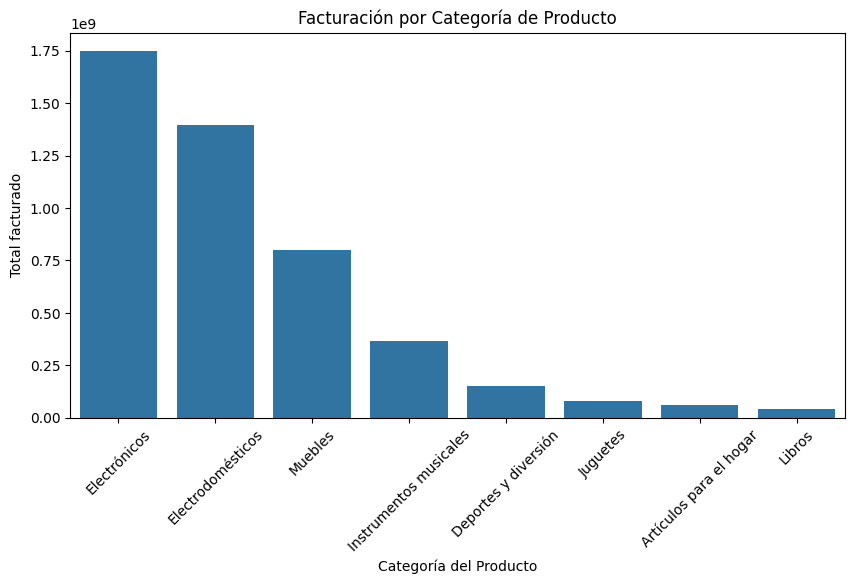

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=facturacion_categoria.index, y=facturacion_categoria.values)
plt.title("Facturación por Categoría de Producto")
plt.ylabel("Total facturado")
plt.xticks(rotation=45)
plt.show()


In [12]:
print("🔹 Facturación total:")
print(tienda_total["Facturacion_Total"].sum(), "\n")

print("🔹 Facturación por Categoría:")
print(tienda_total.groupby("Categoría del Producto")["Facturacion_Total"].sum().sort_values(ascending=False), "\n")

print("🔹 Facturación por Ciudad:")
print(tienda_total.groupby("Lugar de Compra")["Facturacion_Total"].sum().sort_values(ascending=False), "\n")

print("🔹 Facturación por Vendedor:")
print(tienda_total.groupby("Vendedor")["Facturacion_Total"].sum().sort_values(ascending=False), "\n")


🔹 Facturación total:
4638316200.0 

🔹 Facturación por Categoría:
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturacion_Total, dtype: float64 

🔹 Facturación por Ciudad:
Lugar de Compra
Bogotá           1.911588e+09
Medellín         1.155172e+09
Cali             5.334400e+08
Pereira          2.379276e+08
Barranquilla     1.390751e+08
Cartagena        1.078552e+08
Cúcuta           1.046882e+08
Bucaramanga      9.542230e+07
Riohacha         7.781250e+07
Leticia          7.074500e+07
Santa Marta      5.593210e+07
Pasto            5.162760e+07
Neiva            2.200640e+07
Manizales        2.039080e+07
Villavicencio    1.406150e+07
Soacha           1.297830e+07
Armenia          1.288320e+0

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


/tmp/ipython-input-1020384653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


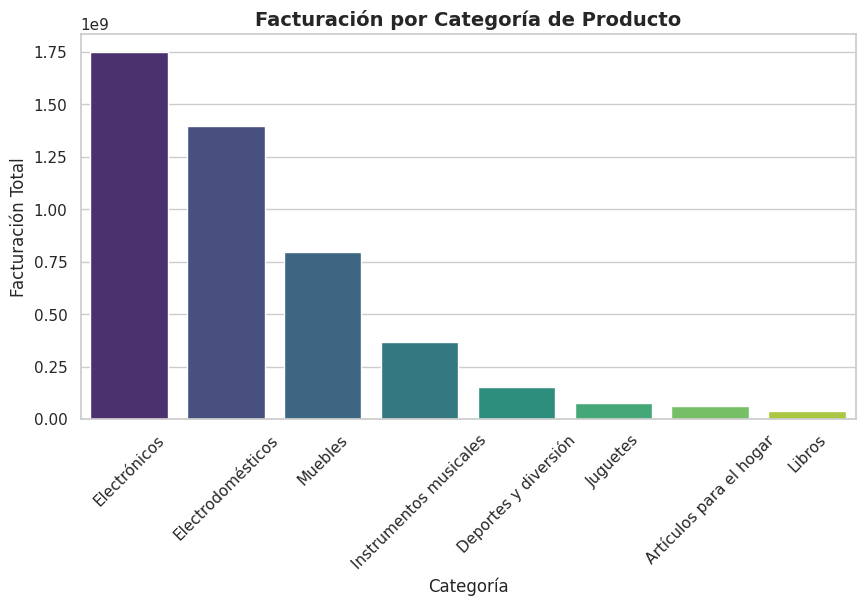

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=facturacion_categoria.index,
    y=facturacion_categoria.values,
    palette="viridis"
)
plt.title("Facturación por Categoría de Producto", fontsize=14, weight="bold")
plt.ylabel("Facturación Total")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3283740389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


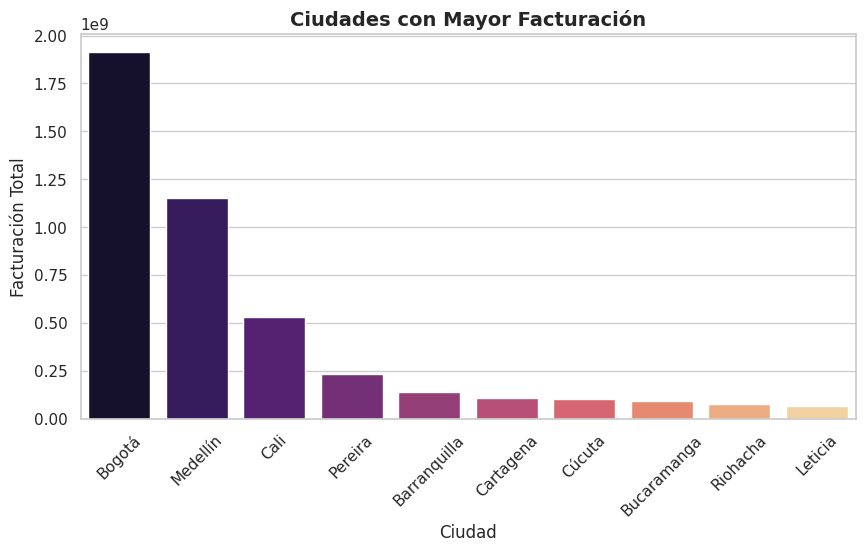

In [22]:
top_ciudades = facturacion_ciudad.head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_ciudades.index,
    y=top_ciudades.values,
    palette="magma"
)
plt.title("Ciudades con Mayor Facturación", fontsize=14, weight="bold")
plt.ylabel("Facturación Total")
plt.xlabel("Ciudad")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3306727477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


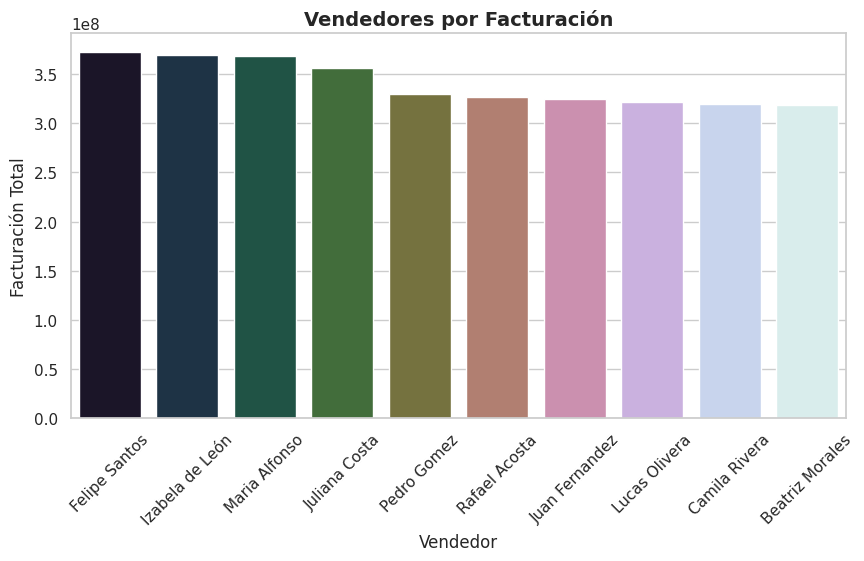

In [21]:
top_vendedores = facturacion_vendedor.head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_vendedores.index,
    y=top_vendedores.values,
    palette="cubehelix"
)
plt.title("Vendedores por Facturación", fontsize=14, weight="bold")
plt.ylabel("Facturación Total")
plt.xlabel("Vendedor")
plt.xticks(rotation=45)
plt.show()

# 2. Ventas por categoría

In [17]:
ventas_categoria = tienda_total.groupby("Categoría del Producto")["Facturacion_Total"].sum().sort_values(ascending=False)
ventas_categoria

,Facturacion_Total
Categoría del Producto,
Electrónicos,1.749039e+09
Electrodomésticos,1.395147e+09
Muebles,7.981114e+08
Instrumentos musicales,3.672769e+08
Deportes y diversión,1.506693e+08
Juguetes,7.762570e+07
Artículos para el hogar,6.069090e+07
Libros,3.975600e+07


## **Ventas por ciudad**

In [18]:
ventas_ciudad = tienda_total.groupby("Lugar de Compra")["Facturacion_Total"].sum().sort_values(ascending=False)
ventas_ciudad

,Facturacion_Total
Lugar de Compra,
Bogotá,1.911588e+09
Medellín,1.155172e+09
Cali,5.334400e+08
Pereira,2.379276e+08
Barranquilla,1.390751e+08
Cartagena,1.078552e+08
Cúcuta,1.046882e+08
Bucaramanga,9.542230e+07
Riohacha,7.781250e+07


/tmp/ipython-input-3672499324.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ciudades.index, y=top_ciudades.values, palette="flare")


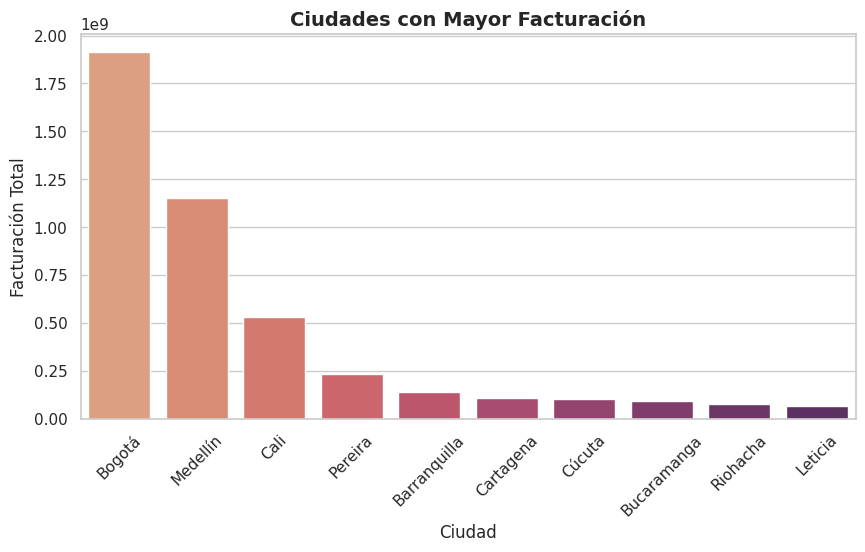

In [20]:
top_ciudades = ventas_ciudad.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_ciudades.index, y=top_ciudades.values, palette="flare")
plt.title("Ciudades con Mayor Facturación", fontsize=14, weight="bold")
plt.xlabel("Ciudad")
plt.ylabel("Facturación Total")
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


In [23]:
calificacion_promedio = tienda_total["Calificación"].mean()
calificacion_promedio

np.float64(4.014520402755696)

In [24]:
tienda_total["Calificación"].value_counts().sort_index()

,count
Calificación,
1,1199
2,343
3,830
4,1813
5,5250


/tmp/ipython-input-1108214035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Calificación", data=tienda_total, palette="viridis")


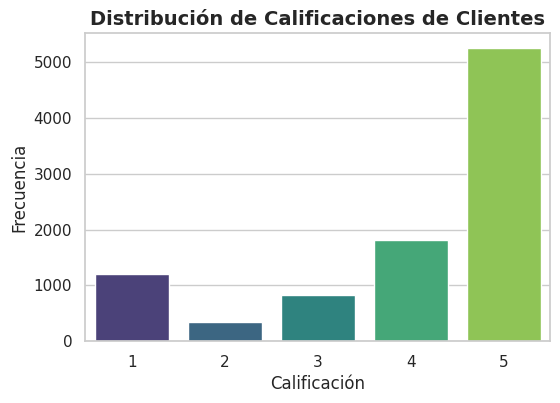

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="Calificación", data=tienda_total, palette="viridis")
plt.title("Distribución de Calificaciones de Clientes", fontsize=14, weight="bold")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.show()

# 4. Productos más y menos vendidos

In [28]:
ventas_producto = tienda_total["Producto"].value_counts()
ventas_producto

,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199


## **Producto(s) más vendidos (Top 5)**

In [29]:
top_5_productos = ventas_producto.head(5)
top_5_productos

,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201


## **Producto(s) menos vendidos**

In [30]:
bottom_5_productos = ventas_producto.tail(5)
bottom_5_productos

,count
Producto,
Ciencia de datos con Python,166
Guitarra eléctrica,165
Mochila,163
Auriculares con micrófono,158
Celular ABXY,157


/tmp/ipython-input-3013021122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_productos.values, y=top_5_productos.index, palette="crest")


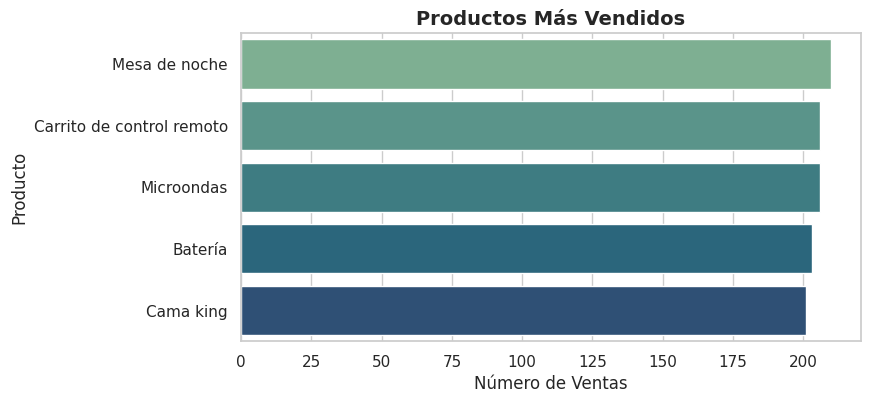

In [32]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_5_productos.values, y=top_5_productos.index, palette="crest")
plt.title("Productos Más Vendidos", fontsize=14, weight="bold")
plt.xlabel("Número de Ventas")
plt.ylabel("Producto")
plt.show()

# 5. Envío promedio por tienda

In [33]:
envio_promedio_ciudad = tienda_total.groupby("Lugar de Compra")["Costo de envío"].mean().sort_values(ascending=False)
envio_promedio_ciudad

,Costo de envío
Lugar de Compra,
Soacha,34768.421053
Inírida,30557.142857
Cúcuta,28597.311828
Pasto,27801.063830
Neiva,27710.000000
Bucaramanga,26790.055249
Cali,26726.812314
Leticia,25317.605634
Medellín,25282.022472


/tmp/ipython-input-4261454437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio_promedio_ciudad.index, y=envio_promedio_ciudad.values, palette="coolwarm")


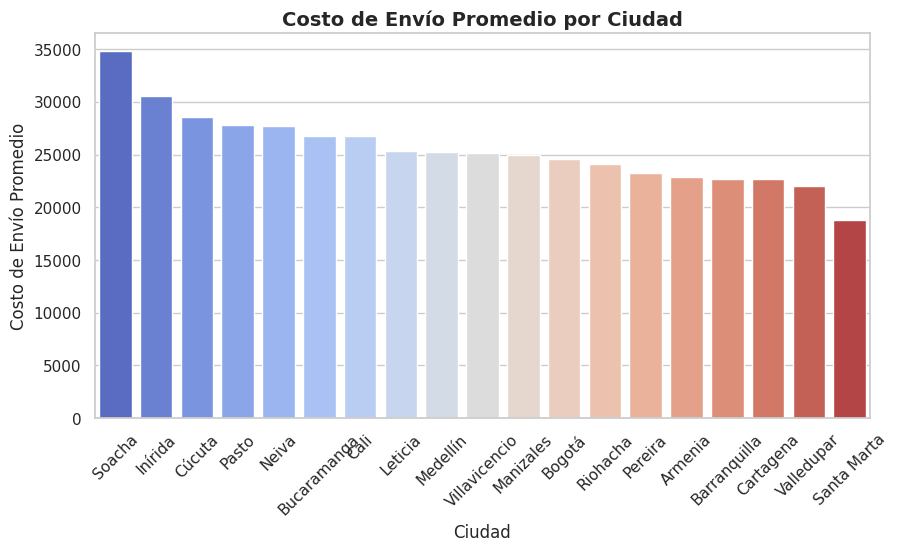

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x=envio_promedio_ciudad.index, y=envio_promedio_ciudad.values, palette="coolwarm")
plt.title("Costo de Envío Promedio por Ciudad", fontsize=14, weight="bold")
plt.xlabel("Ciudad")
plt.ylabel("Costo de Envío Promedio")
plt.xticks(rotation=45)
plt.show()

#  Alura Store - Informe Final de Ventas
## Recomendación de Tienda para el Sr. Juan
## 🎯 Objetivo del Análisis

Identificar en cuál tienda el Sr. Juan debe vender sus productos,
considerando:

- Facturación total por ciudad
- Categorías con mayor demanda
- Calificación de clientes
- Productos más y menos vendidos
- Costo de envío promedio

##  Facturación por Ciudad

La ciudad con mayor volumen de ventas es:

| Ciudad | Facturación Total (COP) |
|-------|-------------------------|
| **Bogotá** | **$1,911,588,000** |
| Medellín | $1,155,172,000 |
| Cali | $533,440,000 |

**Conclusión:** Bogotá concentra la demanda más alta.
## 🏆 Categorías Más Vendidas

1. **Electrónicos**
2. **Electrodomésticos**
3. **Muebles**

Estas categorías representan el mayor ingreso y muestran la preferencia del mercado.

## ⭐ Calificación de Clientes

La tienda mantiene una **calificación promedio de 4.01 / 5**, lo que indica
un **alto nivel de satisfacción** en la experiencia de compra.


##  Rotación de Productos

- Los productos de **Electrónicos y Electrodomésticos** son los más vendidos.
- Los productos de baja demanda muestran poca rotación.

**Esto confirma la alta preferencia por artículos tecnológicos.**

## 🚚 Costo de Envío

Bogotá presenta costos de envío competitivos debido a su
infraestructura logística y mayor cobertura de entregas.

# ✅ Recomendación Final

Se recomienda que el Sr. Juan venda en:

## 🏙️ **Bogotá**

### ¿Por qué?

- Mayor volumen de ventas totales
- Alta demanda de productos de mayor valor
- Buenas calificaciones de clientes (satisfacción elevada)
- Costo logístico de envío equilibrado

**Bogotá ofrece el mejor escenario para aumentar ventas y ganancias.**
